In [ ]:
# Taken from
# https://nbviewer.jupyter.org/url/graphics.stanford.edu/courses/cs205a/assets/section_slides/hw0_section_notes.ipynb

In [13]:
using PyPlot

In [10]:
x_min = -5
x_max = 5
n = 101
dx = (x_max - x_min) / (n - 1)

x = linspace(x_min, x_max, n)

-5.0:0.1:5.0

In [11]:
mu = 0.0
sigma_sqr = 1
sigma_sqr_inv = 1 / sigma_sqr

1.0

In [19]:
G = exp.(-(1 / 2) * (1 / sigma_sqr) * (x - mu).^ 2);

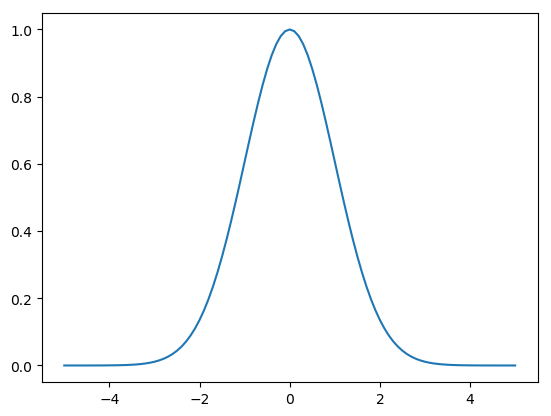

In [21]:
plot(x, G);

In [27]:
G[1:3]

3-element Array{Float64,1}:
 3.72665e-6
 6.11357e-6
 9.9295e-6 

In [28]:
(G * dx)[1:3]

3-element Array{Float64,1}:
 3.72665e-7
 6.11357e-7
 9.9295e-7 

In [29]:
sum(G * dx)

2.5066271792963963

In [30]:
function meshgrid(vx::AbstractVector{T}, vy::AbstractVector{T}) where T
    m, n = length(vy), length(vy)
    vx = reshape(vx, 1, n)
    vy = reshape(vy, m, 1)
    return (repmat(vx, m, 1), repmat(vy, 1, n))
end

meshgrid (generic function with 1 method)

In [36]:
x1_min         = -5.0
x2_min         = -5.0
x1_max         = 5.0
x2_max         = 5.0
num_samples_x1 = 11
num_samples_x2 = 11
dx1            = (x1_max - x1_min) / (num_samples_x1 - 1)
dx2            = (x2_max - x2_min) / (num_samples_x2 - 1)
half_dx1       = 0.5*dx1
half_dx2       = 0.5*dx2

# Matlab-style meshgrid function.
X2,X1 = meshgrid(linspace(x2_min,x2_max,num_samples_x2), linspace(x1_min,x1_max,num_samples_x1));

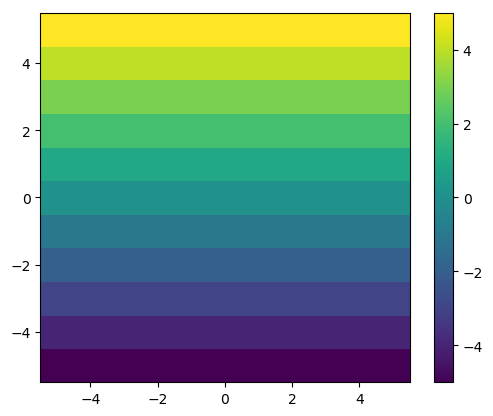

In [37]:
pcolormesh(linspace(x2_min-half_dx2,x2_max+half_dx2,num_samples_x2+1),
           linspace(x1_min-half_dx1,x1_max+half_dx1,num_samples_x1+1),
           X1);
plt[:gca]()[:set_aspect]("equal");
colorbar();

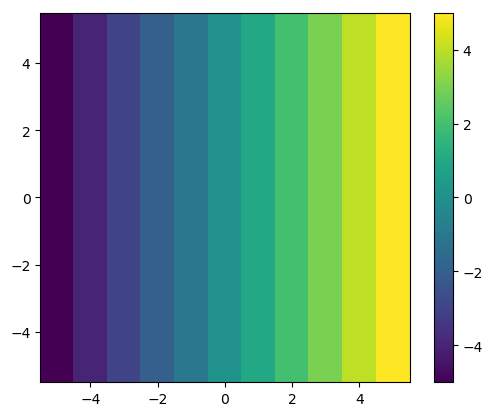

In [38]:
pcolormesh(linspace(x2_min-half_dx2,x2_max+half_dx2,num_samples_x2+1),
           linspace(x1_min-half_dx1,x1_max+half_dx1,num_samples_x1+1),
           X2);
plt[:gca]()[:set_aspect]("equal");
colorbar();

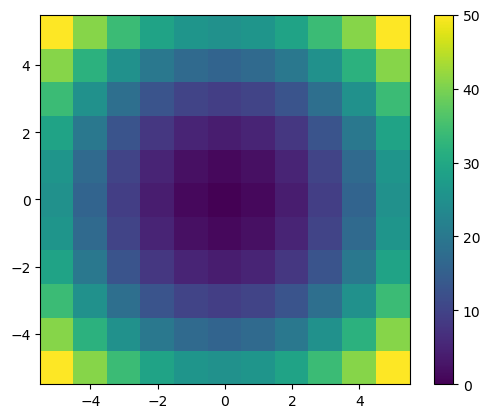

In [39]:
# Can easily use the output arrays from meshgrid in mathematical expressions.
F = X1.^2.0 + X2.^2.0

pcolormesh(linspace(x2_min-half_dx2,x2_max+half_dx2,num_samples_x2+1),
           linspace(x1_min-half_dx1,x1_max+half_dx1,num_samples_x1+1),
           F);
plt[:gca]()[:set_aspect]("equal");
colorbar();


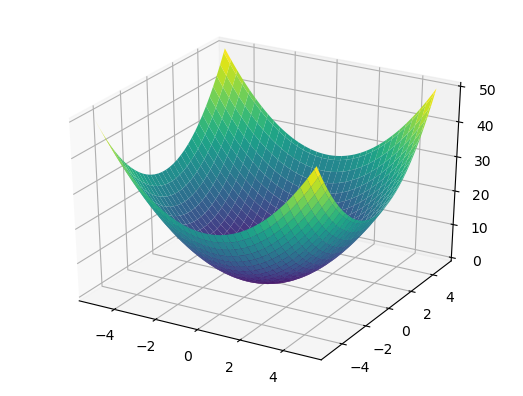

In [40]:
x1_min         = -5.0
x2_min         = -5.0
x1_max         = 5.0
x2_max         = 5.0
num_samples_x1 = 101
num_samples_x2 = 101
dx1            = (x1_max - x1_min) / (num_samples_x1 - 1)
dx2            = (x2_max - x2_min) / (num_samples_x2 - 1)
half_dx1       = 0.5*dx1
half_dx2       = 0.5*dx2

X2,X1 = meshgrid(linspace(x2_min,x2_max,num_samples_x2), linspace(x1_min,x1_max,num_samples_x1))

F = X1.^2.0 + X2.^2.0

plot_surface(X2,X1,F,cmap="viridis");

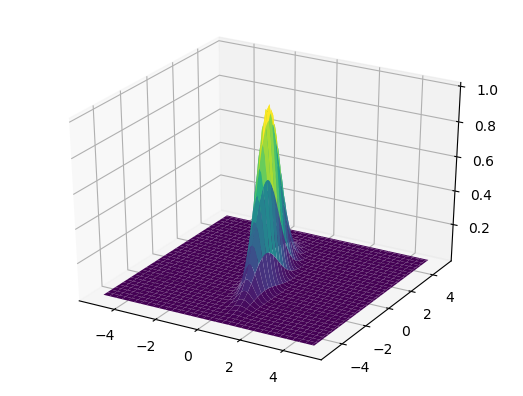

In [41]:
# Non-normalized 2D Gaussian function.
function G_func_2d(mu, Sigma_sqr_inv, x)
    G = exp.(-(1.0/2.0)*(x - mu)'*Sigma_sqr_inv*(x - mu))
    return G[1,1]
end

mu            = [0 0]'
Sigma_sqr_inv = [1 2; 2 10]
# Sigma_sqr_inv = [1 0; 0 1]
G             = zeros(num_samples_x1,num_samples_x2)

# Can also easily construct functions with explicit for-loops
# noticeably faster than Python or Matlab.
for i1 = 1:num_samples_x1
    for i2 = 1:num_samples_x2
        x = [ X1[i1,i2] X2[i1,i2] ]'
        G[i1,i2] = G_func_2d(mu, Sigma_sqr_inv, x)
    end
end

plot_surface(X2,X1,G,cmap="viridis");

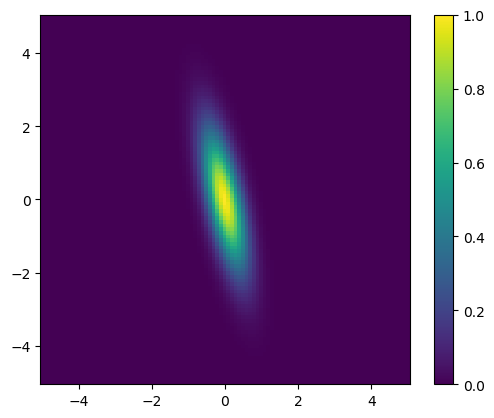

In [42]:
pcolormesh(linspace(x2_min-half_dx2,x2_max+half_dx2,num_samples_x2+1),
           linspace(x1_min-half_dx1,x1_max+half_dx1,num_samples_x1+1),
           G);
plt[:gca]()[:set_aspect]("equal");
colorbar();

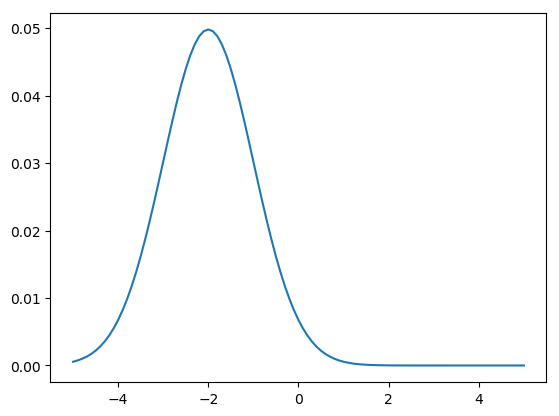

In [43]:
# Can slice arrays as in Matlab and Python.
plot(X1[:,61],G[:,61]);